# Sprint 2

## Goal

The goal for this sprint is to quickly develop a first model, so your client (Huispedia) has something concrete they can provide you feedback on.

Some questions you may want to ask:
- What type of problem is this?
- What model may be well-suited for this type of problem?
- What features do you add?
- How can we evaluate, in a fair way, how well our model is doing?

## Imports

We'll need some packages to build a model. SciKit-Learn is very extensive, but we'll start fairly simple.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

sns.set() # For aesthetic purposes
np.random.seed(42) # So all our results will be the same

## Load data

Let's load the data in again, and actually split it into `X` (our features) and `y` (our target variable).

In [2]:
# Training data
df_train = pd.read_csv("../data/train.csv").set_index('Id')
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'], axis=1)

This next step is very important. If you've built models before, this is obvious, but I cannot stress this enough. When we train a model on our data, the model will learn to fit those data as well as possible. But how can we know if the model that we found will also work well on _new_ data? That's what these train/test splits are for.

We keep a portion of our data — the 'test set' — separate, and once we've trained our model on the rest — the train set — we evaluate how well our model actually performs, by looking at how well it performs on the test set. That way, we can make a good estimate of how well the model will perform on unseen data.

**Here, I use a test set size of 20% of our data. Can you figure out what would happen if we'd make this number much larger or smaller?**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Selecting features

Here, I use the features we found during the first sprint. It's amazing how quickly you can find the features that are worthwhile if you just spend some time getting acquainted with the data, rather than building a model immediately!

In [4]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [5]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Now, the moment you've all been waiting for... we're going train our first model! Are you ready..?

In [6]:
# Getting our model, with all default parameters...
lr = linear_model.LinearRegression()
# Wait for it...
lr.fit(X_train, y_train);
# Presto!

That's all! That's how simple it is to train a machine learning model in SciKit-Learn. Let's see how well we did.

## Checking our performance

As mentioned earlier, we want to evaluate our performance on the data our model hasn't seen yet. That's what X_test is for. The code below will use the trained model (which is now stored in `lr` to make predictions for the data stored in `X_test`, and save those predicted values in `y_hat`, our predicted prices.

In [7]:
y_hat = lr.predict(X_test)

Then, we just compare those predicted prices to the real prices, and we get our performance! Here, I use the RMSE to get a sense of our performance

**Does RMSE make sense here? Why?**

In [8]:
print(f"RMSE: €{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}")

RMSE: €39710.99


And a quick scatter plot to see how well we did...

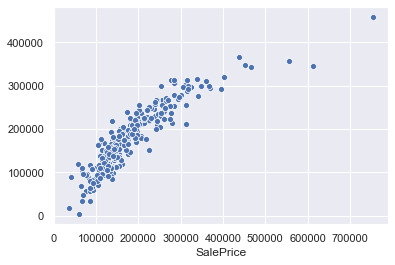

In [9]:
sns.scatterplot(y_test, y_hat);

Not too shabby! It's not quite perfect, but clearly close. It seems our errors are further off for the more expensive houses... let's see if that's true.

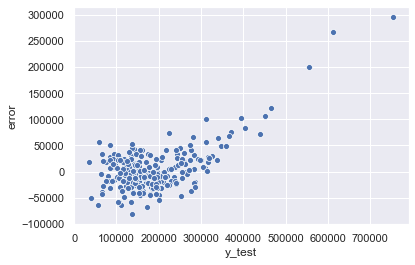

In [10]:
result = pd.DataFrame({'y_test': y_test, 'y_hat': y_hat})
result['error'] = result['y_test'] - result['y_hat']
sns.scatterplot(result['y_test'], result['error']);

Our hunch was correct: for (relatively) cheap houses, up to about $ $300.000,-, we do quite well. After that, our errors get pretty big (up to about 50% of the value of the house!).

**Why did this happen? And can we fix it?**

Clearly, we have far fewer examples of really expensive houses (remember the `distplot` from the last sprint?), so our model doesn't really know how to fit to those houses. In the next sprint, let's see if we can fix this somewhat.

**If you have more time, feel free to try using a different model! You can find the SciKit-Learn documentation [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).**